## Importig the Modules

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, f_oneway

In [3]:

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## Step-1 : Load Data

In [11]:
df=pd.read_csv('credit_risk_dataset.csv')
df.sample(5)

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24434,28,52000,RENT,12.0,VENTURE,A,10000,6.92,0,0.19,N,8
27824,32,249996,MORTGAGE,4.0,PERSONAL,C,14000,12.99,0,0.06,N,8
19943,29,35000,RENT,1.0,DEBTCONSOLIDATION,A,10625,7.90,0,0.30,N,8
4001,26,55000,RENT,0.0,EDUCATION,A,4000,6.92,0,0.07,N,4
31410,38,92904,MORTGAGE,8.0,MEDICAL,B,5375,10.51,0,0.06,N,16


In [15]:
df.shape

(32581, 12)

## STEP 2 : INITIAL DATA INFO

In [41]:
print('\n--- Data info ---')
df.info()


--- Data info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [39]:
print("\n--- Missing Values ---")
df.isnull().sum()


--- Missing Values ---


person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [43]:
print('\n ---- Data NAN vaues ---- ')
df[df['person_emp_length'].isna()].sample(5,random_state = 42)


 ---- Data NAN vaues ---- 


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
24270,33,70632,MORTGAGE,NaN,MEDICAL,B,1500,10.65,0,0.02,N,5
15213,22,24000,OWN,NaN,VENTURE,A,1500,6.91,0,0.06,N,4
17955,29,230000,MORTGAGE,NaN,MEDICAL,A,8500,7.49,0,0.04,N,10
25046,30,25536,RENT,NaN,MEDICAL,C,12000,14.79,1,0.47,Y,10
1388,22,26400,MORTGAGE,NaN,HOMEIMPROVEMENT,A,1550,NaN,1,0.06,N,2


In [45]:
print('\n ---- Data NAN vaues in another way ---- ')
cols_with_nulls = ['loan_int_rate']
df[df[cols_with_nulls].isna().any(axis=1)].sample(5)


 ---- Data NAN vaues in another way ---- 


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
2358,23,40000,RENT,0.0,DEBTCONSOLIDATION,B,2500,NaN,0,0.06,N,2
30120,37,27000,RENT,4.0,MEDICAL,B,5500,NaN,0,0.20,N,12
21563,33,33500,RENT,0.0,EDUCATION,A,6000,NaN,0,0.18,N,9
30238,36,44000,RENT,2.0,HOMEIMPROVEMENT,E,6000,NaN,1,0.14,N,12
28368,27,90000,MORTGAGE,4.0,DEBTCONSOLIDATION,A,15000,NaN,0,0.17,N,6


In [47]:
print('\n---- Data Descriptive stats---')
df.describe()


---- Data Descriptive stats---


,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


## Step-3:Handling Missing Values

In [50]:
print('\n ---Filling person_emp_length missing values based on median of similar income range---')
df['person_emp_length'] = df.groupby('person_home_ownership')['person_emp_length'].transform(lambda x: x.fillna(x.median()))


 ---Filling person_emp_length missing values based on median of similar income range---


In [56]:
print('\n --- Filling the Loan intrest rate values based on the median of the loan grade ---')
df['loan_int_rate'] = df.groupby('loan_grade')['loan_int_rate'].transform(lambda x: x.fillna(x.median()))


 --- Filling the Loan intrest rate values based on the median of the loan grade ---


In [60]:
print("\n--- Missing values after filling ---")
print(df.isnull().sum())


--- Missing values after filling ---
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


## Step-4: OUTLIER DETECTION & HANDLING

In [73]:
def handle_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] > upper, upper,np.where(df[col] < lower, lower, df[col]))
    return df

num_cols = ['person_age','person_income','person_emp_length','loan_amnt',
            'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']

for col in num_cols:
    df = handle_outliers(df, col)

print("\n---Outliers handled successfully---")


---Outliers handled successfully---


## Step-5: Univariate Analysis

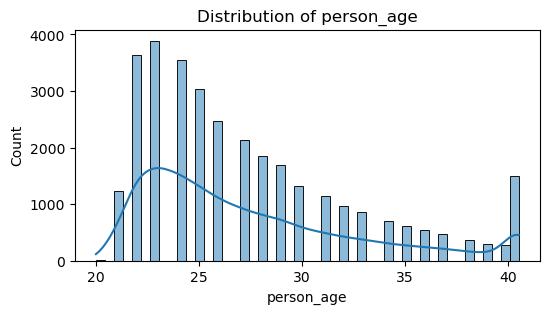

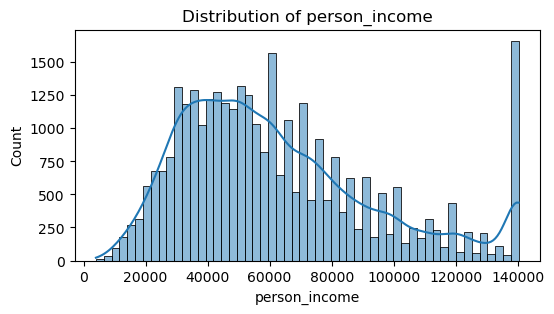

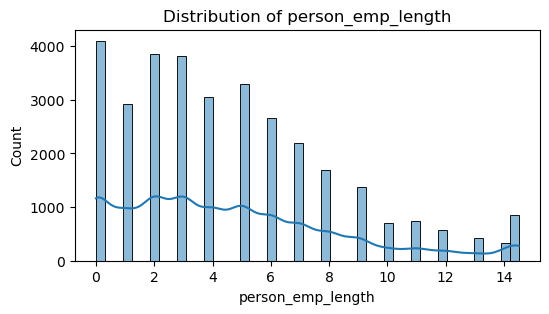

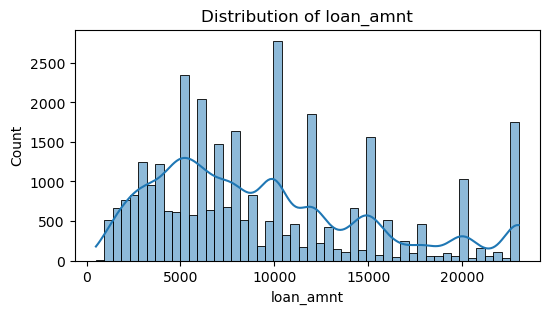

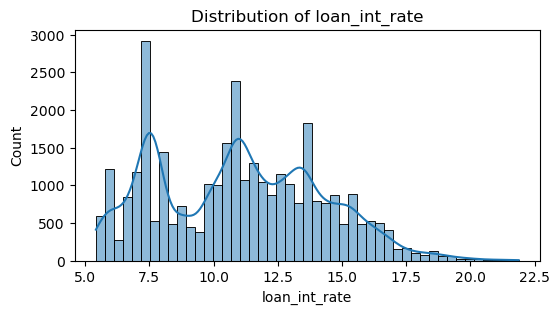

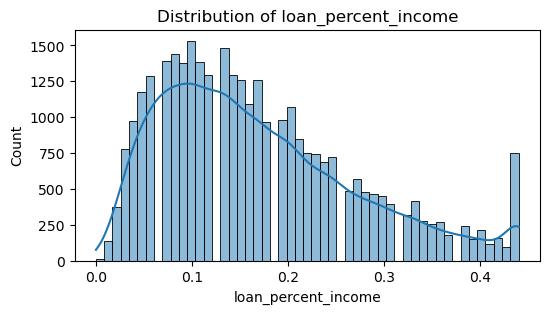

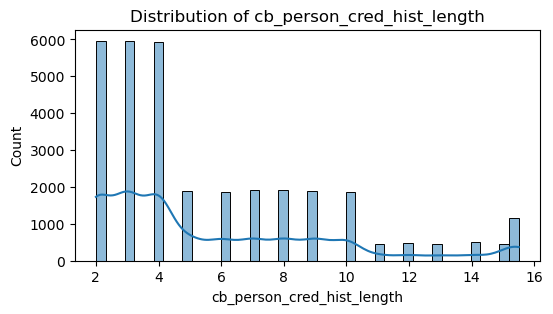

In [76]:
for col in num_cols:
    plt.figure(figsize=(6,3))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

## STEP 6 : BIVARIATE ANALYSIS (VS TARGET)

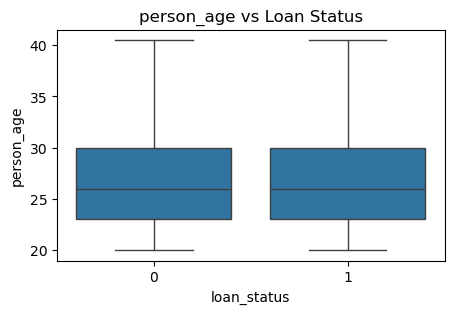

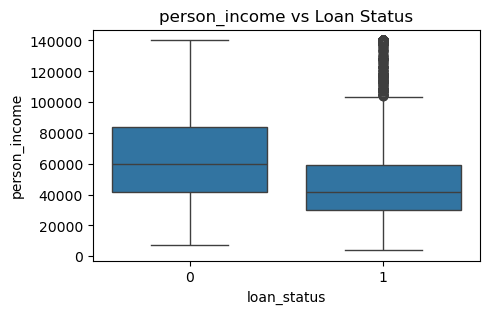

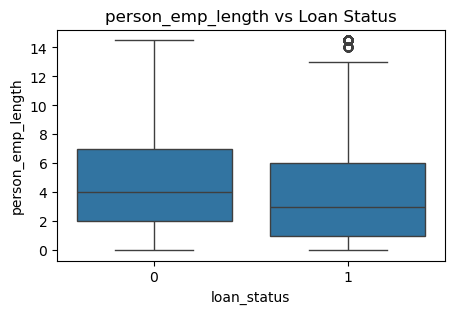

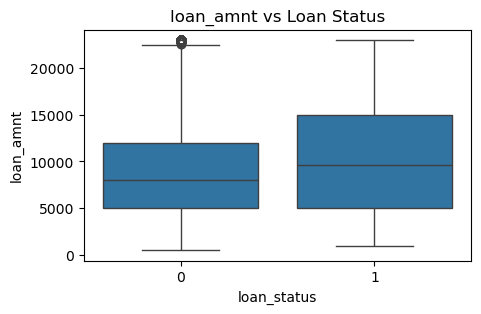

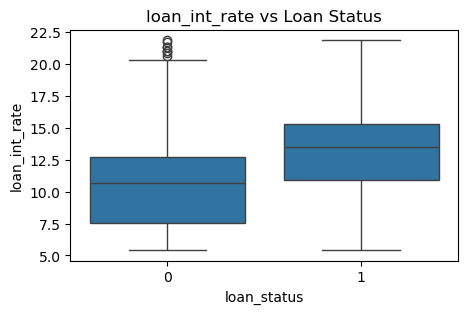

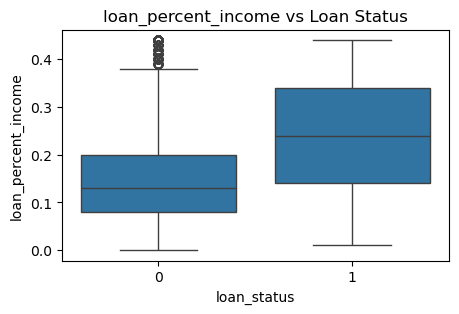

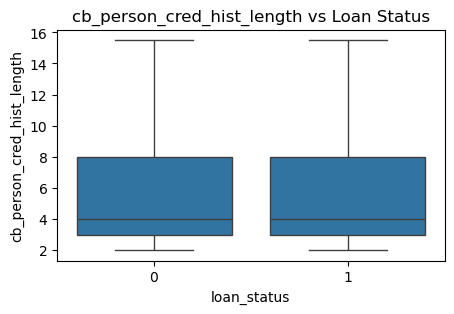

In [79]:
target = 'loan_status'

for col in num_cols:
    plt.figure(figsize=(5,3))
    sns.boxplot(x=target , y=col, data=df)
    plt.title(f"{col} vs Loan Status")
    plt.show()

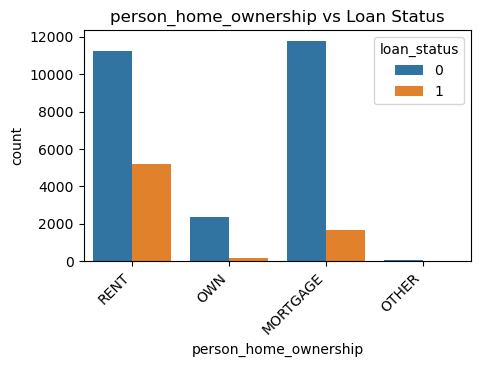

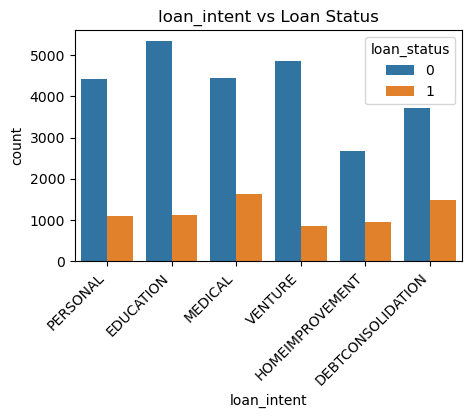

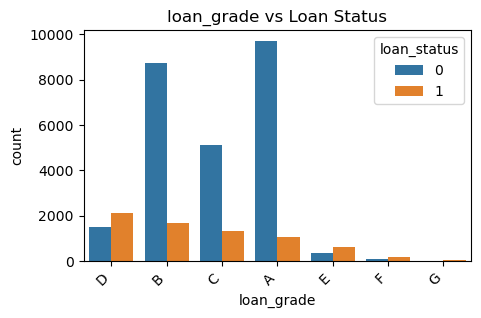

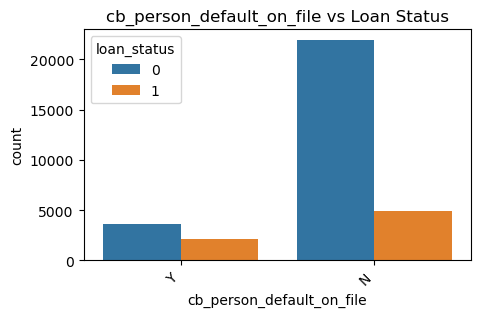

In [103]:
cat_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, hue=target, data=df)
    plt.xticks(rotation=45,ha='right')
    plt.title(f"{col} vs Loan Status")
    plt.show()

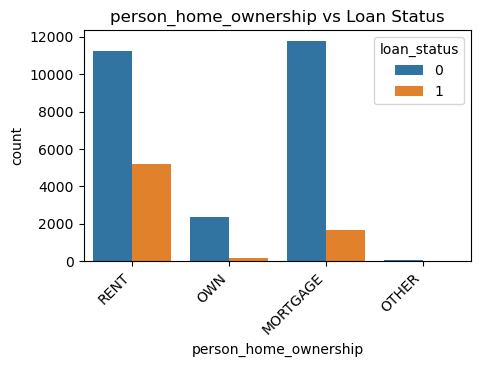

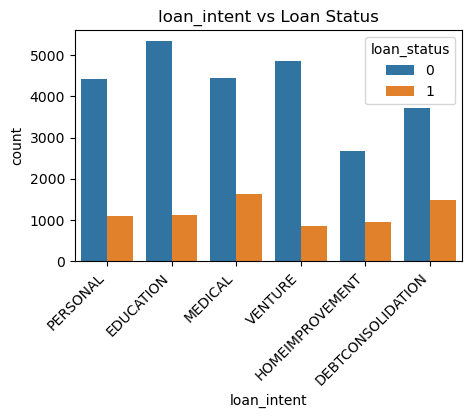

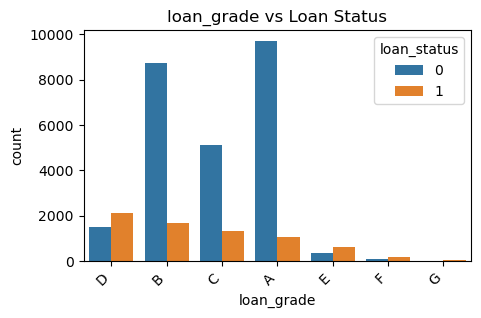

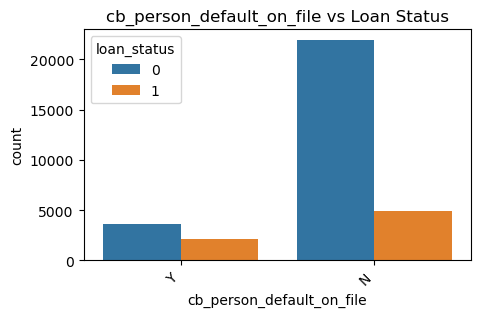

In [99]:
cat_cols = ['person_home_ownership','loan_intent','loan_grade','cb_person_default_on_file']

for col in cat_cols:
    plt.figure(figsize=(5,3))
    sns.countplot(x=col, hue='loan_status', data=df)
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{col} vs Loan Status")
    plt.show()


## STEP 7 : FEATURE SIGNIFICANCE TESTS

In [106]:
print("\n--- Chi-Square Test {Categorical vs Target} ---")

for col in cat_cols:
    table = pd.crosstab(df[col], df[target])
    chi2, p, dof, exp = chi2_contingency(table)
    print(f"{col}: p-value = {p:.4f}")


--- Chi-Square Test {Categorical vs Target} ---
person_home_ownership: p-value = 0.0000
loan_intent: p-value = 0.0000
loan_grade: p-value = 0.0000
cb_person_default_on_file: p-value = 0.0000


In [108]:
print("\n--- ANOVA Test {Numerical vs Target} ---")

for col in num_cols:
    group0 = df[df[target]==0][col]
    group1 = df[df[target]==1][col]
    f, p = f_oneway(group0, group1)
    print(f"{col}: p-value = {p:.4f}")


--- ANOVA Test {Numerical vs Target} ---
person_age: p-value = 0.0000
person_income: p-value = 0.0000
person_emp_length: p-value = 0.0000
loan_amnt: p-value = 0.0000
loan_int_rate: p-value = 0.0000
loan_percent_income: p-value = 0.0000
cb_person_cred_hist_length: p-value = 0.0007


## STEP 8 : CORRELATION HEATMAP

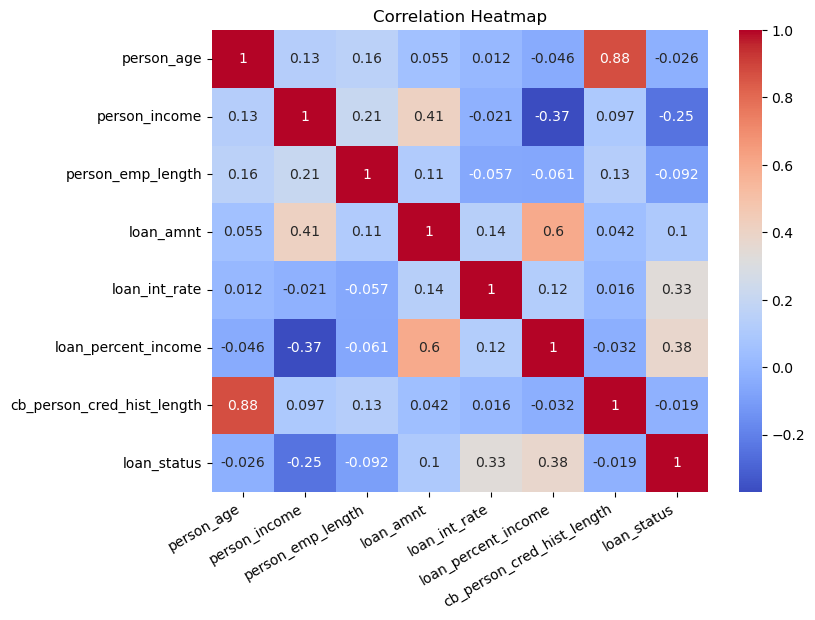

In [117]:
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols + [target]].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.xticks(rotation=30,ha='right')
plt.show()

In [125]:
print('\n --- Highlighting only correlation with target ---')
num_cols = ['person_age','person_income','person_emp_length','loan_amnt',
            'loan_int_rate','loan_percent_income','cb_person_cred_hist_length']
target = 'loan_status'
df[num_cols + [target]].corr()[target].sort_values()


 --- Highlighting only correlation with target ---


person_income                -0.245934
person_emp_length            -0.092325
person_age                   -0.026076
cb_person_cred_hist_length   -0.018881
loan_amnt                     0.104524
loan_int_rate                 0.333655
loan_percent_income           0.377787
loan_status                   1.000000
Name: loan_status, dtype: float64

## *SPRINT 1 : Exploratory Data Analysis (EDA) COMPLETED*

## *SPRINT 2 : MODEL BUILDING*

In [139]:
print("\nTask: Classification")
print("Target variable: loan_status")
print("Metric: Accuracy")


Task: Classification
Target variable: loan_status
Metric: Accuracy


### Step 3 : Split Data

In [143]:
X = df.drop(columns=['loan_status'])
y = df['loan_status']

In [159]:
X_train,X_test,y_train,y_test=train_test_split(
    X,y,test_size =0.25,random_state = 42,stratify=y)

In [157]:
print('\n --- Shapes of the Sample data for Train and Test ---')
print('\n Train Shape :',X_train.shape)
print('\n Test Shape :',y_test.shape)


 --- Shapes of the Sample data for Train and Test ---

 Train Shape : (8145, 11)

 Test Shape : (24436,)


## Step:4 Data Preparation

In [166]:
print('\n --- Dividing data into num and cat --- ')
num_feature = num_cols
cat_features= [c for c in X.columns if c not in num_feature]


 --- Dividing data into num and cat --- 


In [175]:
print('\n --- Numeric Transformer Pipeline---')
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])


 --- Numeric Transformer Pipeline---


In [179]:
print('\n --- categorical Transformer Ptpeline --- ')
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])


 --- categorical Transformer Ptpeline --- 


In [189]:
print('\n --- Column Transformer Pipe line ---')
preprocessor = ColumnTransformer(transformers=[
    ('num',numeric_transformer,num_feature),
    ('cat',categorical_transformer,cat_features)])


 --- Column Transformer Pipe line ---


## Step 6 : Models Building

In [203]:
models = { 
    'KNN':KNeighborsClassifier(),
    'LogisticRegression':LogisticRegression(max_iter=1000,random_state=42),
    'SVM':SVC(kernel='rbf',random_state=42),
    'DecisionTree':DecisionTreeClassifier(random_state=42),
    'RandomForest':RandomForestClassifier(n_estimators=100,random_state=42)
}
results={}
trained_model={}
print('\n -----------Accuracy and the models f1-Score respectively--------------')
for name,model in models.items():
    pipe=Pipeline(steps=[('preprocessor',preprocessor),
                         ('classifier',model)])
    pipe.fit(X_train,y_train)
    trained_model[name]=pipe
    y_pred =  pipe.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
    results[name] = acc
    print(f'\n {name} Accuracy:{acc:4f}')
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))


 -----------Accuracy and the models f1-Score respectively--------------

 KNN Accuracy:0.893199
[[6165  204]
 [ 666 1111]]
              precision    recall  f1-score   support

           0       0.90      0.97      0.93      6369
           1       0.84      0.63      0.72      1777

    accuracy                           0.89      8146
   macro avg       0.87      0.80      0.83      8146
weighted avg       0.89      0.89      0.89      8146


 LogisticRegression Accuracy:0.869384
[[6052  317]
 [ 747 1030]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      6369
           1       0.76      0.58      0.66      1777

    accuracy                           0.87      8146
   macro avg       0.83      0.76      0.79      8146
weighted avg       0.86      0.87      0.86      8146


 SVM Accuracy:0.919592
[[6304   65]
 [ 590 1187]]
              precision    recall  f1-score   support

           0       0.91      0.99      0.95      6

### Step 7 : Compare Models 

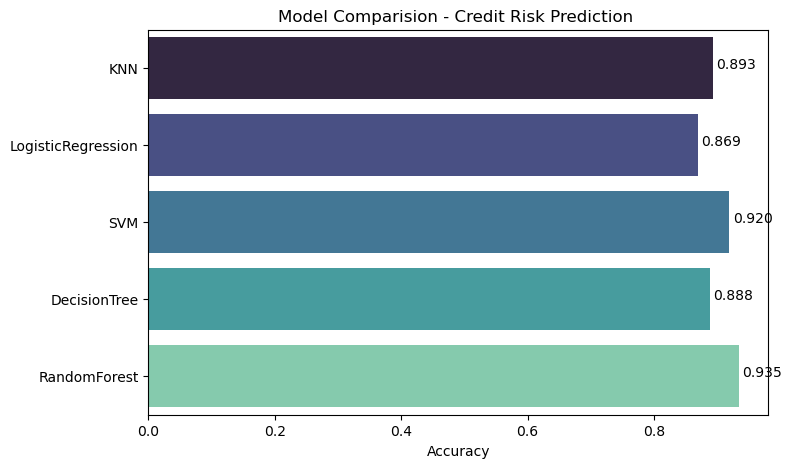

In [215]:
plt.figure(figsize=(8,5))
sns.barplot(x=list(results.values()),y=list(results.keys()),palette='mako')
plt.xlabel('Accuracy')
plt.title('Model Comparision - Credit Risk Prediction ')
for i,(name,acc) in enumerate(results.items()):
    plt.text(acc+0.005,i,f'{acc:.3f}')
plt.show()

In [219]:
best_model = max(results,key=results.get)
print(f'\n Best Model : {best_model} with Accuracy = {results[best_model]:.4f}')


 Best Model : RandomForest with Accuracy = 0.9346
